In [31]:
from keras.datasets import mnist
from keras.utils import np_utils
import numpy as np 
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

11501568/11490434 [==============================] - 1s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


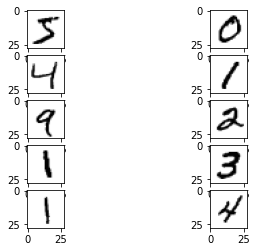

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [32]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
 
def plot_images(images, idx, num=10):
    fig = plt.gcf()
    for i in range(num):
        ax = plt.subplot(5, 2, 1+i)
        ax.imshow(images[idx+i], cmap='binary')
    plt.show()
plot_images(x_train, 0, 10)
 
x_train_nom = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')/255
x_test_nom = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')/255 
 
y_train1hot = np_utils.to_categorical(y_train)#to_categorical is the conversion of a categorical vector into a binary (0 and 1 only) matrix type representation. This is done by converting the original categorical vector into a one-hot encoded form.
print(y_train1hot[:3])

In [33]:
#building the model
model = Sequential()#Establish a linear stacking model
 
model.add(Conv2D(filters = 16,
                kernel_size=(3, 3),
                padding='same',
                activation='relu',
                input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(filters=36,
                kernel_size = (3, 3),
                padding = 'same',
                activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation = 'softmax'))

In [59]:
#Model compilation and training, epoch is 11, batchesize is 64, and 0.2 of the training data is used as the validation set
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
train_history = model.fit(x = x_train_nom,
                         y = y_train1hot,
                         epochs=11,
                         batch_size=64,
                         verbose=2,
                         validation_split=0.2)

Epoch 1/11
750/750 - 13s - loss: 0.0225 - accuracy: 0.9925 - val_loss: 0.0352 - val_accuracy: 0.9908 - 13s/epoch - 17ms/step
Epoch 2/11
750/750 - 12s - loss: 0.0208 - accuracy: 0.9930 - val_loss: 0.0314 - val_accuracy: 0.9923 - 12s/epoch - 16ms/step
Epoch 3/11
750/750 - 12s - loss: 0.0187 - accuracy: 0.9938 - val_loss: 0.0310 - val_accuracy: 0.9915 - 12s/epoch - 17ms/step
Epoch 4/11
750/750 - 12s - loss: 0.0166 - accuracy: 0.9944 - val_loss: 0.0350 - val_accuracy: 0.9917 - 12s/epoch - 17ms/step
Epoch 5/11
750/750 - 13s - loss: 0.0152 - accuracy: 0.9948 - val_loss: 0.0350 - val_accuracy: 0.9920 - 13s/epoch - 17ms/step
Epoch 6/11
750/750 - 12s - loss: 0.0159 - accuracy: 0.9944 - val_loss: 0.0303 - val_accuracy: 0.9923 - 12s/epoch - 17ms/step
Epoch 7/11
750/750 - 12s - loss: 0.0151 - accuracy: 0.9944 - val_loss: 0.0312 - val_accuracy: 0.9921 - 12s/epoch - 16ms/step
Epoch 8/11
750/750 - 12s - loss: 0.0134 - accuracy: 0.9957 - val_loss: 0.0361 - val_accuracy: 0.9915 - 12s/epoch - 17ms/step


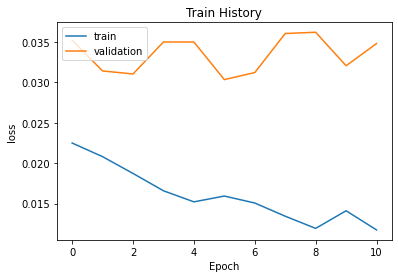

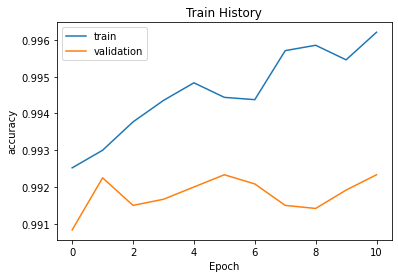

313/313 [==============================] - 1s 4ms/step - loss: 0.0288 - accuracy: 0.9927
[0.028843902051448822, 0.9926999807357788]


In [60]:
#result.Test accuracy is 0.9907 and loss is 0.253, if increase epoch the result will be better
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc = 'upper left')
    plt.savefig(train)
    plt.show()
    
show_train_history(train_history, 'loss', 'val_loss')
show_train_history(train_history, 'accuracy', 'val_accuracy')
 
y_test1hot = np_utils.to_categorical(y_test)
scores = model.evaluate(x_test_nom, y_test1hot)
print(scores)